In [1]:
import ast
import json
import math
import pandas as pd
from IPython.display import Image
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
channels = pd.read_csv('../info/channels_labeled.csv')
channels.head()

,channel_id,channel_name,created_date,created_by,folder,actual_name,folder_name
0,C0GQ664PQ,general,2015-12-16,Paul,others,general,general
1,C0GQ0GH1S,random,2015-12-16,Paul,others,random,random
2,CBH1274KV,msan501,2018-07-01,Terence,mod1_summer,Computation for Analytics,computation_for_analytics
3,CBL5QGXCG,msan502-2018,2018-07-08,Kirsten,mod1_summer,Linear Algebra,linear_algebra
4,CBMV8E51R,msan504_2018,2018-07-10,Jeff,mod1_summer,Probability and Statistics,probability_and_statistics


In [3]:
users = pd.read_csv("../info/members_labeled.csv")
users.head(3)

,member_id,member_name,member_type,country
0,U9WDUU4LE,GitHub,bot,NaN
1,USLACKBOT,Slackbot,bot,NaN
2,UAZK0M7RR,Polly,bot,NaN


In [4]:
messages = pd.read_csv("../info/messages.csv")
messages['count_messages'] = 1
messages.head()

,text,reactions,ts,user,parent_user_id,files,module,course,count_reactions,date,count_messages
0,<@UBMMHRHE2> has left the channel,NaN,2019-04-26 11:08:19,UBMMHRHE2,NaN,NaN,mod1_summer,computation_for_analytics,0,2019-04-26,1
1,<@UBKUL888Y> has left the channel,NaN,2019-04-09 10:44:11,UBKUL888Y,NaN,NaN,mod1_summer,computation_for_analytics,0,2019-04-09,1
2,<@UBLC0B98U> has left the channel,NaN,2019-03-27 20:38:38,UBLC0B98U,NaN,NaN,mod1_summer,computation_for_analytics,0,2019-03-27,1
3,<@UBL0QKZ9N> has left the channel,NaN,2019-03-19 21:16:21,UBL0QKZ9N,NaN,NaN,mod1_summer,computation_for_analytics,0,2019-03-19,1
4,<@UBMJ5RRGE> has left the channel,NaN,2019-02-15 01:10:26,UBMJ5RRGE,NaN,NaN,mod1_summer,computation_for_analytics,0,2019-02-15,1


<hr>

In [5]:
def update_reactions(reaction):
    if not isinstance(reaction, str):
        return None
    else:
        return ast.literal_eval(reaction)

In [6]:
messages['reactions'] = messages['reactions'].apply(lambda reaction: update_reactions(reaction))
msg_rc = [message for message in messages.reactions.values if message is not None]
msg_rc = sum(msg_rc,[])

In [7]:
tups = {}

for ru in msg_rc:
    reaction = ru['name']
    for user in ru['users']:
        pair = (reaction,user)
        if pair not in tups:
            tups[pair] = 1
        else:
            tups[pair] = tups[pair]+1
            
tups = [list((tup[0],tup[1],count)) for tup,count in zip(tups.keys(),tups.values())]
df_user_reaction = pd.DataFrame(tups).set_index([1,0]).rename_axis([None,None]).unstack()[2].fillna(0).astype(int).reset_index()

In [8]:
df_user_reaction.head()

,index,+1,+1::skin-tone-2,+1::skin-tone-3,+1::skin-tone-4,+1::skin-tone-5,-1,-1::skin-tone-2,-1::skin-tone-3,-1::skin-tone-4,...,yodawg,young_jeff,yum,zac,zany_face,zero,zipper_mouth_face,zoidberg,zombie_walking,zzz
0,U0GQ664LW,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,U0GQ7U3GB,22,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,U0GS8VAHW,12,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,U0PNLQA67,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,U12NAEKS7,23,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_user_reaction['name'] = df_user_reaction['index'].apply(lambda user: users[users['member_id']==user].member_name.values[0])
df_user_reaction['country'] = df_user_reaction['index'].apply(lambda user: users[users['member_id']==user].country.values[0])

In [10]:
df_user_reaction.head()

,index,+1,+1::skin-tone-2,+1::skin-tone-3,+1::skin-tone-4,+1::skin-tone-5,-1,-1::skin-tone-2,-1::skin-tone-3,-1::skin-tone-4,...,yum,zac,zany_face,zero,zipper_mouth_face,zoidberg,zombie_walking,zzz,name,country
0,U0GQ664LW,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Paul Intrevado,USA
1,U0GQ7U3GB,22,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Yannet Interian,Cuba
2,U0GS8VAHW,12,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,David Uminsky,USA
3,U0PNLQA67,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Mindi Mysliwiec,USA
4,U12NAEKS7,23,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,James Wilson,USA


In [11]:
# Total number of reactions
df_user_reaction.sum()[1:-1].sort_values(ascending=False).sum()

33890

In [12]:
# Users that react the most
# df_user_reaction.set_index('name').sum(axis=1).sort_values(ascending=False)[:10]

In [13]:
# Most used reactions
df_user_reaction.sum()[1:-1].sort_values(ascending=False)[:10]

heart             3825
+1                3636
joy               2821
plus_one          2499
jeffsmile         1180
thank_you         1081
clapping           816
heart_eyes_cat     561
horrified          548
amaze              511
dtype: object

In [14]:
# Number of reactions per country
df_user_reaction.groupby('country').sum().sum(axis=1).sort_values(ascending=False)

country
USA          13246
China         9535
Colombia      2607
India         1611
Taiwan        1403
Malaysia       853
Armenia        784
Korea          668
Canada         402
Vietnam        364
Spain          307
Singapore      301
Germany        271
Brazil         219
Russia         201
Tunisia        170
England        100
Peru            98
Cuba            96
Argentina       40
dtype: int64

In [15]:
# Number of reactions per country normalized 
(df_user_reaction.groupby('country').sum().sum(axis=1)/users.groupby('country').count().member_id).sort_values(ascending=False)

country
Colombia     2607.000000
Malaysia      853.000000
Armenia       784.000000
Taiwan        701.500000
Vietnam       364.000000
Korea         334.000000
USA           323.073171
Spain         307.000000
Singapore     301.000000
China         297.968750
Germany       271.000000
India         230.142857
Brazil        219.000000
Canada        201.000000
Tunisia       170.000000
Russia        100.500000
England       100.000000
Peru           98.000000
Cuba           96.000000
Argentina      40.000000
dtype: float64

In [16]:
# Most used reaction per country
for country in users.country.unique()[1:]:
    print(f"{country:7} \t {df_user_reaction.groupby('country').sum().loc[country].sort_values(ascending=False).keys()[0]}")

Canada  	 heart
China   	 +1
USA     	 joy
Cuba    	 +1
Korea   	 heart
Argentina 	 heart
Russia  	 +1
England 	 +1
Vietnam 	 +1
Germany 	 heart
India   	 heart
Armenia 	 joy
Taiwan  	 heart
Brazil  	 joy
Tunisia 	 +1
Singapore 	 heart
Colombia 	 plus_one
Malaysia 	 heart
Spain   	 +1
Peru    	 +1


# First plot

In [17]:
first_plot = pd.DataFrame((df_user_reaction.groupby('country').sum().sum(axis=1)/users.groupby('country').count().member_id))
first_plot.columns = ['count']
first_plot['codes'] = ['ARG','ARM','BRA','CAN','CHN','COL','CUB','GBR', 'DEU', 'IND', 'KOR', 'MYS', 'PER', 'RUS', 'SGP', 'ESP', 'TWN', 'TUN', 'USA', 'VNM']
first_plot = first_plot.reset_index()
first_plot.head()

,country,count,codes
0,Argentina,40.00000,ARG
1,Armenia,784.00000,ARM
2,Brazil,219.00000,BRA
3,Canada,201.00000,CAN
4,China,297.96875,CHN


In [18]:
data_plot = [go.Choropleth(
                locations = first_plot['codes'],
                z = first_plot['count'],
                text = [f"{country}<br># reactions: {reacs:,}<br># users: {users}<br>scaled: {scaled}" for reacs,users,country,scaled in zip(df_user_reaction.groupby('country').sum().sum(axis=1).values,users.groupby('country').count().member_id.values,first_plot.country.values,first_plot['count'].values)],
                hoverinfo = 'text',
                colorscale= 'Greens',
                reversescale = True,
                colorbar = go.choropleth.ColorBar(
                title = 'Number of reactions<br>(Scaled)'),
                marker = go.choropleth.Marker(
                    line = go.choropleth.marker.Line(
                    color = 'rgb(180,180,180)',
                    width = 0.7
                )),
            )]

layout = go.Layout(
            title = go.layout.Title(
            text = 'Scaled number of Slack reactions<br>per country of origin'
            ),
            geo = go.layout.Geo(
                showframe = False,
                showcountries = False,
                coastlinewidth=0.08,
                showcoastlines = True
            ),)

In [19]:
first_plot2 = first_plot[first_plot['country']!="Colombia"]
data_plot2 = [go.Choropleth(
                locations = first_plot2['codes'],
                z = first_plot2['count'],
                text = [f"{country}<br># reactions: {reacs:,}<br># users: {users}<br>scaled: {scaled}" for reacs,users,country,scaled in zip(df_user_reaction.groupby('country').sum().sum(axis=1).values,users.groupby('country').count().member_id.values,first_plot.country.values,first_plot['count'].values)][:5]+[f"{country}<br># reactions: {reacs:,}<br># users: {users}<br>scaled: {scaled}" for reacs,users,country,scaled in zip(df_user_reaction.groupby('country').sum().sum(axis=1).values,users.groupby('country').count().member_id.values,first_plot.country.values,first_plot['count'].values)][6:],
                hoverinfo = 'text',
                colorscale= 'Greens',
                reversescale = True,
                colorbar = go.choropleth.ColorBar(
                title = 'Number of reactions<br>(Scaled)'),
                marker = go.choropleth.Marker(
                    line = go.choropleth.marker.Line(
                    color = 'rgb(180,180,180)',
                    width = 0.7
                )),
            )]

In [20]:
first_plot0 = pd.DataFrame(df_user_reaction.groupby('country').sum().sum(axis=1))
first_plot0.columns = ['count']
first_plot0['codes'] = ['ARG','ARM','BRA','CAN','CHN','COL','CUB','GBR', 'DEU', 'IND', 'KOR', 'MYS', 'PER', 'RUS', 'SGP', 'ESP', 'TWN', 'TUN', 'USA', 'VNM']
first_plot0 = first_plot0.reset_index()

In [21]:
data_plot0 = [go.Choropleth(
                locations = first_plot0['codes'],
                z = first_plot0['count'],
                text = [f"{country}<br># reactions: {reacs:,}<br># users: {users}" for reacs,users,country,scaled in zip(df_user_reaction.groupby('country').sum().sum(axis=1).values,users.groupby('country').count().member_id.values,first_plot.country.values,first_plot['count'].values)],
                hoverinfo = 'text',
                colorscale= 'Greens',
                reversescale = True,
                colorbar = go.choropleth.ColorBar(
                title = 'Number of reactions'),
                marker = go.choropleth.Marker(
                    line = go.choropleth.marker.Line(
                    color = 'rgb(180,180,180)',
                    width = 0.7
                )),
            )]

layout = go.Layout(
            title = go.layout.Title(
            text = 'Number of Slack reactions<br>per country of origin'
            ),
            geo = go.layout.Geo(
                showframe = False,
                showcountries = False,
                coastlinewidth=0.08,
                showcoastlines = True
            ),)

In [22]:
fig = go.Figure(data = data_plot0, layout = layout)
iplot(fig, filename = 'd3-world-map')

In [23]:
fig = go.Figure(data = data_plot, layout = layout)
iplot(fig, filename = 'd3-world-map')

In [24]:
fig = go.Figure(data = data_plot2, layout = layout)
iplot(fig, filename = 'd3-world-map')

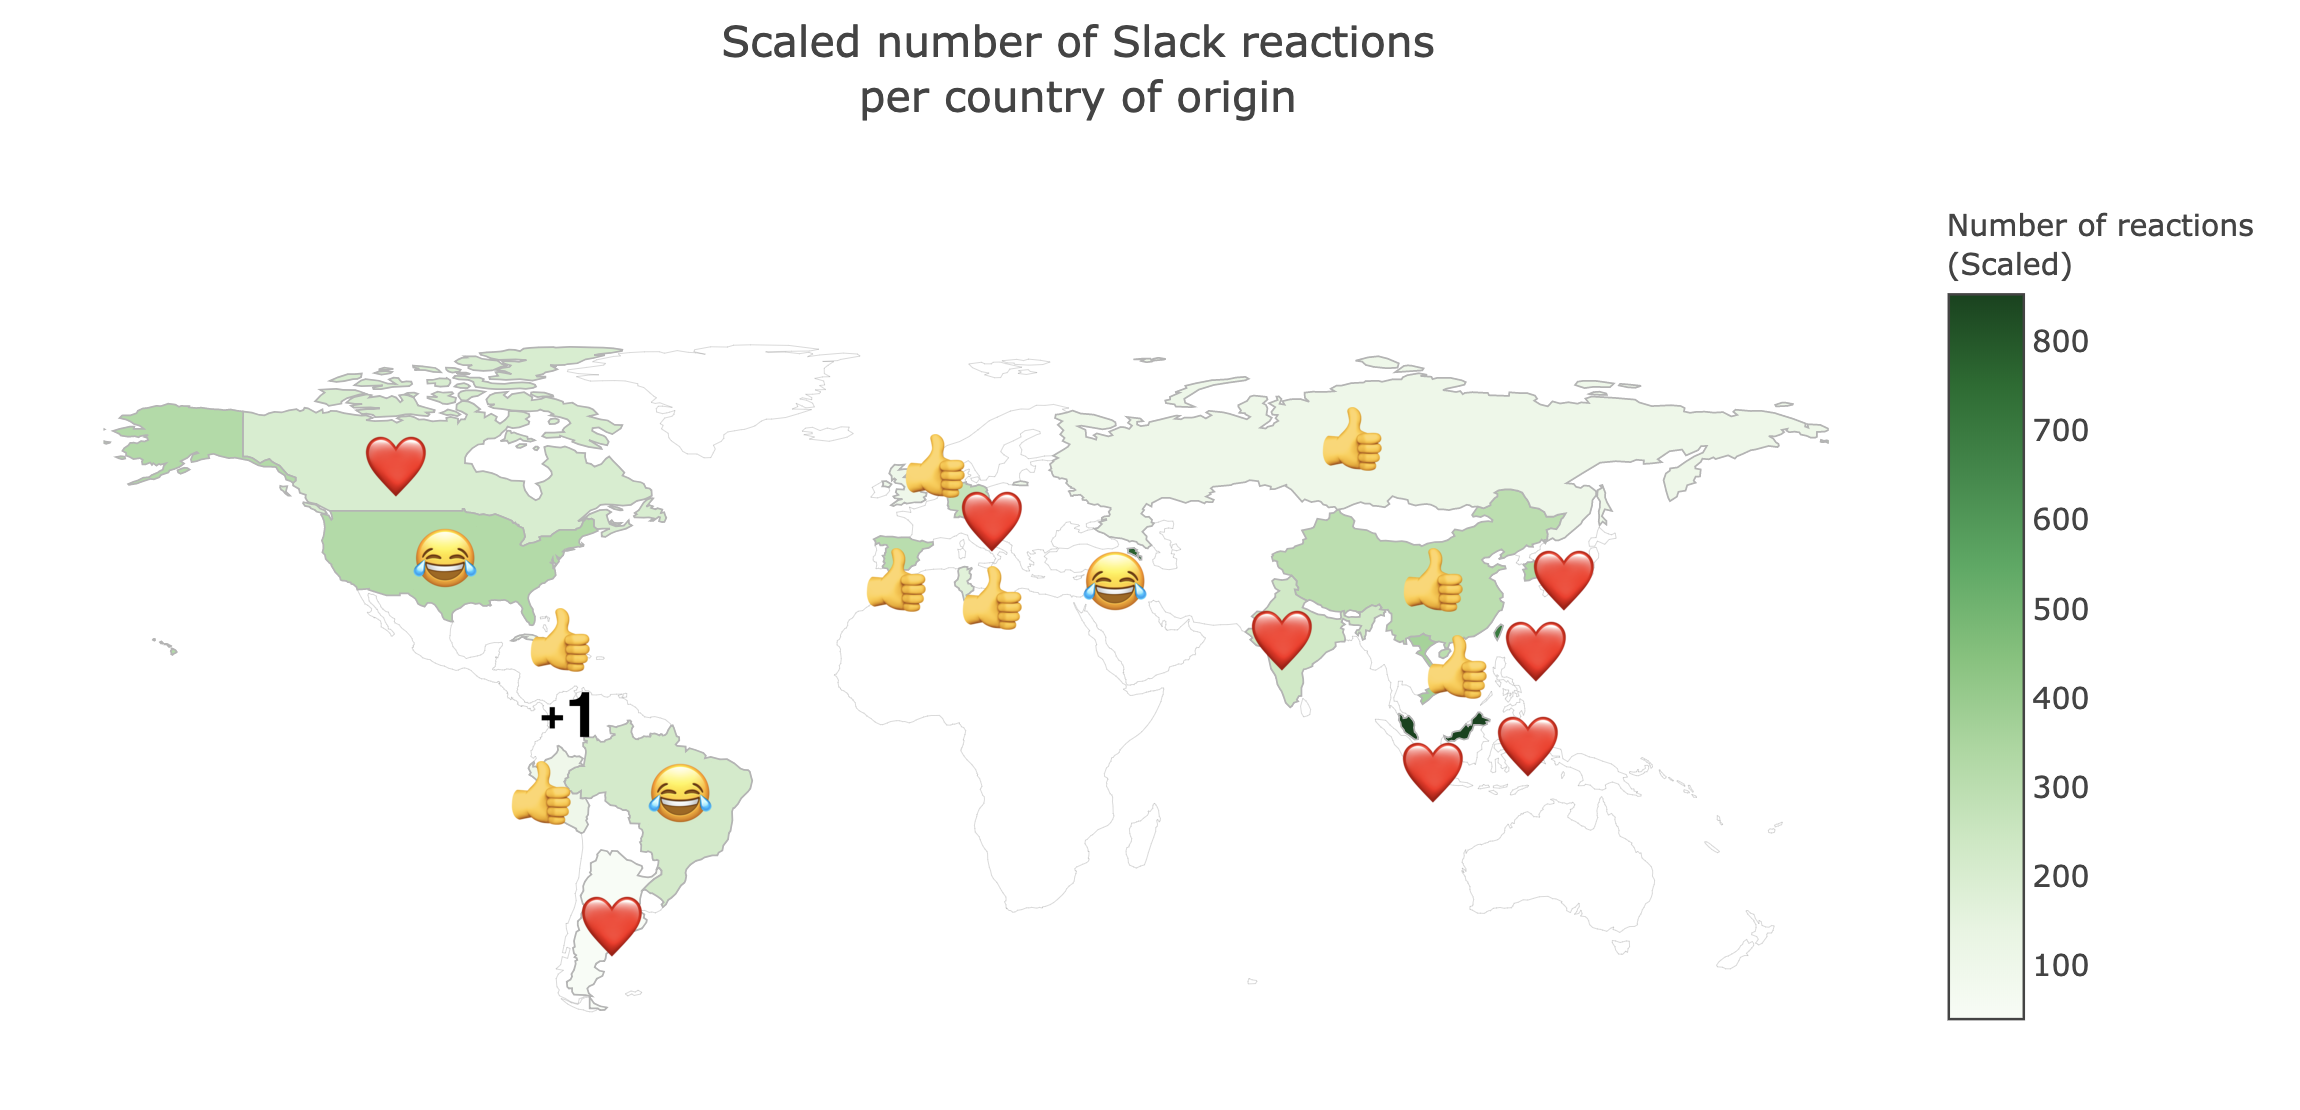

In [25]:
Image(filename="emojis.png")